# Sprint9 深層学習スクラッチ ニューラルネットワーク

### Sprintの目的
スクラッチを通してニューラルネットワークの基礎を理解する

画像データの扱い方を知る

### どのように学ぶか
スクラッチで単純なニューラルネットワークを実装した後、学習と検証を行なっていきます。


In [45]:
### MNISTデータをDLする。
### コンソールで pip install keras と tensorflow を実施する必要があった。
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [46]:
### ↑は警告のようなので、一旦保留
### MNISTとは？＞画像分類のための定番データセットで、手書き数字認識を行います。
### 画像データとは？＞デジタル画像は点の集合で、これをピクセルと呼ぶ。

In [47]:
### データの中身を見てみる
print(X_train.shape)
print(X_test.shape)
print(X_train[0].dtype)
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [48]:
### 平滑化(flatten)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
# print(X_train)
# print(X_train.shape)
# reshape の-1は元の形状から推測されて決定される。何故か60000？？w

<function matplotlib.pyplot.show>

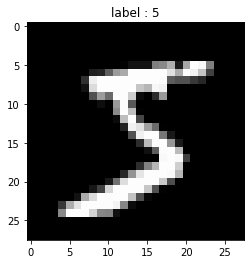

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28, 28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show

In [50]:
### 前処理 サンプルコード１
### 機械学習をする上で画像を0から1のfloat型で扱う必要がある。
import numpy as np
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [51]:
### 前処理 サンプルコード2
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [52]:
### 前処理 サンプルコード3
from sklearn.model_selection import train_test_split # データ分割

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [57]:
### 雛形
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self, verbose = False, r = 0.1, epochs=3, sigma=0.01):
        # 問題１：重みの初期値を決めるコードの作成
        # selfを宣言している関数で使用できるようにする。
        self.verbose = verbose
        self.epochs = epochs
        self.sigma = sigma

        sigma = 0.01

        n_features = 784
        n_nodes1 = 400
        n_nodes2 = 200
        n_output = 10

        # ノード間の重みを求める
        self.W1 = sigma * np.random.randn(n_features, n_nodes1)
        self.W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
        self.W3 = sigma * np.random.randn(n_nodes2, n_output)
        
        # 次のノードの重さを求める
        self.B1 = self.sigma * np.random.randn(n_nodes1)
        self.B2 = self.sigma * np.random.randn(n_nodes2)
        self.B3 = self.sigma * np.random.randn(n_output)
        # 問題１：重みの初期値を決めるコードの作成ここまで
        
        self.cross_entropy_list = []
        self.cross_entropy_list_val = []

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
           
        #【問題2】フォワードプロパゲーションの実装
        get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

        print(len(get_mini_batch)) # 2400
        print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
        
        for mini_X_train, mini_y_train in get_mini_batch:
            # このfor文内でミニバッチが使える
            # 1層目の入力
            a1 = X@self.W1 + self.B1
            Z1 = np.maximum(0, a1) # 活性化（ReLU）させる

            # 2層目の入力
            a2 = Z1@self.W2 + self.B2
            Z2 = np.maximum(0, a2) # 活性化（ReLU）させる

            # 3層目の入力
            a3 = Z2@self.W3 * self.B3
            # ソフトマックス関数（微分しやすくする為に実施）
            # axis は行列が逆で！！0が列で、１が行
            Z3 = (np.exp(a3)) / np.sum(np.exp(a3),axis = 1, keepdim = True)
            #【問題2】フォワードプロパゲーションの実装ここまで
            
            #【問題3】交差エントロピー誤差の実装
            mini_y_hot = np.zeros((20, 10)) # one_hot表現用の行列を作成
            for i in range (20):
                mini_y_hot[i,mini_y_train[i]] = 1 #数値に対応した番地に１を入れる
            
            L = 1/batch_size*np.sum(y*np.log(Z3)) # np.sum のaxis 無しで行列を総和可能
            # 【問題3】交差エントロピー誤差の実装ここまで

            # 【問題4】バックプロパゲーションの実装
            # 3層目のバックプロパゲーション
            W2 = W3 - alpha(Z2.T@(Z3 - y))
            # 総和の方法がこれであってる？テキストにあるLをz２で微分するのを使用しない？？次のバックプロバゲーションで使用する。
            B2 = B3 - alpha(np.sum(Z3 - y),axis = 0, keepdim=True)
            
            # 2層目のバックプロパゲーション
            W1 = W2 - alpha(Z1.T@(W2@W3.T)@(1-np.tanh(a2)**2))
            B1 = B2 - alpha(np.sum(W1),axis = 0, keepdim=True)
            
            # 3層目のバックプロパゲーション
            W0 = W1 - alpha(X.T@(W1@W2.T@(1-np.tanh(a1))))
            B0 = B1 - alpha(np.sum(W0),axis = 0, keepdim=True)
            # 【問題4】バックプロパゲーションの実装ここまで

            # 【問題5】推定
            Z31 = np.argmax(Z3)
            print(Z31)
            
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """

        pass
        return

In [54]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練用データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [55]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    a1 = X@W1 + B1
    a2 = a1@W2 + B2
    a3 = a2@W3 * B3

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([4, 7, 9, 7, 6, 2, 9, 1, 5, 0, 4, 8, 5, 4, 0, 1, 7, 0, 1, 1],
      dtype=uint8))


NameError: name 'X' is not defined

### 【問題1】重みの初期値を決めるコードの作成
ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。

### 【問題2】フォワードプロパゲーションの実装
三層のニューラルネットワークの フォワードプロパゲーション を作成してください。
以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。

### 【問題3】交差エントロピー誤差の実装
目的関数（損失関数）を作成します。

### 【問題4】バックプロパゲーションの実装
三層のニューラルネットワークのバックプロパゲーションを作成してください。確率的勾配降下法を行う部分です。

数式を以下に示します。

### 【問題5】推定
推定を行うメソッドを作成してください。

### 【問題6】学習と推定
MNISTのデータを学習・推定し、Accuracyを計算してください。

### 【問題7】学習曲線のプロット
学習曲線をプロットしてください。

ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。
trainデータとvalデータに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。